In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from config import config

In [27]:
from utils import visualize_X_samples_grid

import os
import numpy as np
import pandas as pd

# Check Data Module

In [28]:
from dataset import SpriteDataModule
dm = SpriteDataModule()
dm.setup(stage='fit')
dl = dm.train_dataloader()

INFO     | setup | Loading Sprites
INFO     | setup | Loading Sprite Labels
INFO     | setup | Train Dataset       : 800 samples
INFO     | setup | Validation Dataset  : 200 samples


In [29]:
batch = next(iter(dl))
images, labels = batch
images.shape, labels.shape

(torch.Size([8, 3, 16, 16]), torch.Size([8]))

In [30]:
print(images.min(), images.max())
print(labels.min(), labels.max())

images_0_255 = images * 255.
print(images_0_255.min(), images_0_255.max())

tensor(0.) tensor(1.)
tensor(0, dtype=torch.int32) tensor(3, dtype=torch.int32)
tensor(0.) tensor(255.)


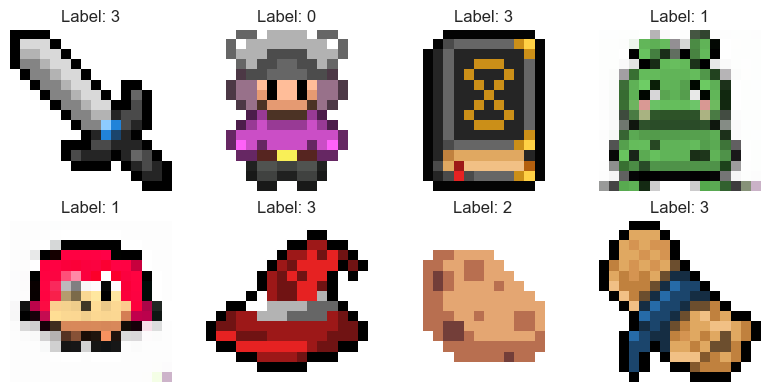

In [31]:
visualize_X_samples_grid(images, labels, n_samples=8, n_cols=4)

# Model

In [21]:
from light import SpriteLightning
light = SpriteLightning()

INFO     | __init__ | Number of Trainable Parameters : 57894275


In [22]:
noise_pred = light.checkout(batch)
noise_pred.shape

torch.Size([8, 3, 16, 16])

In [24]:
print(noise_pred.min().item(), noise_pred.max().item())

-1.5929511785507202 1.0417441129684448


# Generate

In [32]:
clean_images = light.generate()
clean_images.shape

KeyboardInterrupt: 

In [ ]:
# Assuming `images` is your tensor with shape [8, 3, 16, 16]
min_val = clean_images.min()
max_val = clean_images.max()

# Normalize to [0, 1]
images = (clean_images - min_val) / (max_val - min_val)


# Test Images

In [10]:
# images = np.load('./output/test_images/samples.npy')
# labels = np.load('./output/test_images/labels.npy')

# images.shape, labels.shape

In [11]:
# visualize_X_samples_grid(images, labels, n_samples=2, n_cols=2)